# Super Simple RNN

Count "1" in linear RNN

<img src="SimpleRNN01.png" align="left"/>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pdb

In [5]:
train_x = np.array([[[1], [0], [0]],    # dim-0 is training examples in batch - here T=5
                    [[0], [1], [0]],    # dim-1 is across time steps - here 3
                    [[1], [1], [0]],    # dim-2 is width of features vector - here 1
                    [[1], [0], [1]],
                    [[1], [1], [1]]], dtype=np.float64)
train_y = np.array([[1],                # we ignore time steps, thus only 2 dimensions
                    [1],
                    [2],
                    [2],
                    [3]], dtype=np.float64)

s0 = np.array([[0]], dtype=np.float64)
W_hh = np.array([[1]], dtype=np.float64)  # correct answer is W_hh == [[1]]
W_xh = np.array([[1]], dtype=np.float64)  # correct answer is W_xh == [[1]]

In [74]:
def fwd(x, Wxh, Whh):
    assert x.ndim==3 and x.shape[1:]==(3, 1)
    
    x_t1 = x[:,0,:]
    x_t2 = x[:,1,:]
    x_t3 = x[:,2,:]
        
    s0 = np.zeros([len(x), 1])   # [batch_size, nb_state_neurons]
    s1 = s0 @ Whh + x_t1 @ Wxh
    s2 = s1 @ Whh + x_t2 @ Wxh
    s3 = s2 @ Whh + x_t3 @ Wxh
    y_hat = s3
    return y_hat

def back(x, y, Wxh, Whh):
    assert x.ndim==3 and x.shape[1:]==(3, 1)
    assert y.ndim==2 and y.shape[1:]==(1,)
    
    # Forward
    x_t1 = x[:,0,:]
    x_t2 = x[:,1,:]
    x_t3 = x[:,2,:]
    s1 = s0 @ Whh + x_t1 @ Wxh
    s2 = s1 @ Whh + x_t2 @ Wxh
    s3 = s2 @ Whh + x_t3 @ Wxh
    y_hat = s3
    
    # Backward Whh
    err = (y-y_hat)
    der_t1 = s0
    der_t2 = der_t1 @ Whh + s1
    der_t3 = der_t2 @ Whh + s2
    dWhh = -np.sum(err * der_t3, keepdims=True) / len(x)
    
    # Backward Wxh
    der_t1 = x_t1
    der_t2 = der_t1 @ Whh + x_t2
    der_t3 = der_t2 @ Whh + x_t3
    dWxh = -np.sum(err * der_t3, keepdims=True) / len(x)
    
    return dWxh, dWhh

def mse(x, y, Wxh, Whh):
    y_hat = fwd(x, Wxh, Whh)
    return 0.5 * np.mean((y-y_hat)**2)

In [94]:
np.arange(10)[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

### Numerical Gradient Check

In [56]:
def ngrad(x, y, Wxh, Whh):
    dWhh = np.zeros_like(Whh)
    dWxh = np.zeros_like(Wxh)
    eps = 1e-4
    
    for r in range(len(Whh)):
        for c in range(Whh.shape[1]):
            Whh_pls = Whh.copy()
            Whh_min = Whh.copy()
            
            Whh_pls[r, c] += eps
            Whh_min[r, c] -= eps
            
            l_pls = mse(x, y, Wxh, Whh_pls)
            l_min = mse(x, y, Wxh, Whh_min)
            
            dWhh[r, c] = (l_pls - l_min) / (2*eps)
            
    for r in range(len(Wxh)):
        for c in range(Wxh.shape[1]):
            Wxh_pls = Wxh.copy()
            Wxh_min = Wxh.copy()
            
            Wxh_pls[r, c] += eps
            Wxh_min[r, c] -= eps
            
            l_pls = mse(x, y, Wxh_pls, Whh)
            l_min = mse(x, y, Wxh_min, Whh)
            
            dWxh[r, c] = (l_pls - l_min) / (2*eps)
    
    return dWxh, dWhh

**Init to some random values**

In [75]:
W_hh = np.array([[0.95]], dtype=np.float64)  # correct answer is W_hh == [[1]]
W_xh = np.array([[0.95]], dtype=np.float64)  # correct answer is W_xh == [[1]]

In [76]:
fwd(train_x, W_xh, W_hh)

array([[0.857375],
       [0.9025  ],
       [1.759875],
       [1.807375],
       [2.709875]])

**W_xh check**

In [77]:
dW_xh, _ = back(train_x, train_y, W_xh, W_hh)
dW_xh

array([[-0.37204525]])

In [78]:
gW_xh, _ = ngrad(train_x, train_y, W_xh, W_hh)
gW_xh

array([[-0.37204525]])

In [79]:
assert np.allclose(dW_xh, gW_xh)

**W_hh check**

In [80]:
_, dW_hh = back(train_x, train_y, W_xh, W_hh)
dW_hh

array([[-0.431718]])

In [81]:
_, gW_hh = ngrad(train_x, train_y, W_xh, W_hh)
gW_hh

array([[-0.43171798]])

In [82]:
assert np.allclose(dW_hh, gW_hh)

**Train both check**

In [87]:
W_hh = np.array([[0.95]], dtype=np.float64)  # correct answer is W_hh == [[1]]
W_xh = np.array([[0.95]], dtype=np.float64)  # correct answer is W_xh == [[1]]

W_hh = np.random.normal(0.0, 1.0, [1,1])
W_xh = np.random.normal(0.0, 1.0, [1,1])

print('W_xh', W_xh)
print('W_hh', W_hh)

W_xh [[-2.36175463]]
W_hh [[-0.7435213]]


In [88]:
total_iter = 0
log_iter = []
log_loss = []

In [89]:
lr = 0.01
for i in range(500):
    dW_xh, dW_hh = back(train_x, train_y, W_xh, W_hh)
    W_xh += -lr * dW_xh
    W_hh += -lr * dW_hh
    
    loss = mse(train_x, train_y, W_xh, W_hh)
    
    log_iter.append(total_iter)
    log_loss.append(loss)
    total_iter += 1

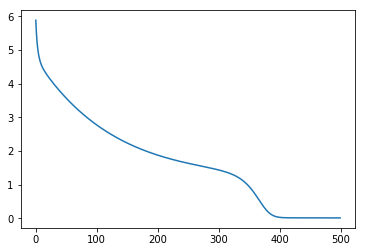

In [90]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(log_iter, log_loss)
plt.show()

In [91]:
fwd(train_x, W_xh, W_hh)

array([[0.83024499],
       [1.0286247 ],
       [1.85886969],
       [2.10465049],
       [3.13327519]])

<br>

██████████████████████████████████████████████████████████████████████████████████████████████████

<br>

# More Proper Example